In [5]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# set input directory
input_dir = 'input'

In [7]:
# set dataset file name
input_data_file = 'data.xlsx'

In [8]:
# display list of files in input directory
os.listdir('input')

['.DS_Store', 'data.xlsx', 'labeled_data.csv']

In [9]:
# to get the input data path
data_path = os.path.join(os.curdir,input_dir,input_data_file)
data_path

'./input/data.xlsx'

In [10]:
# to read data from excel file
raw_data = pd.read_excel(data_path)

In [11]:
raw_data.head()

TEMP  CH4    CO  NMHC   NO NO2 NOx  O3 PM10 PM2.5  RH  SO2
0   16  2.1  0.79  0.14  1.2  16  17  37  177   78x  57   12
1   16  2.1   0.8  0.15  1.3  16  17  36  178   77x  57   11
2   16  2.1  0.71  0.13    1  13  14  38  163   72x  57    8
3   15    2  0.66  0.12  0.8  11  12  39  147   65x  58  6.5
4   15    2  0.53  0.11  0.6  10  11  38  131   56x  58  5.5

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   TEMP    200169 non-null  object
 1   CH4     95822 non-null   object
 2   CO      217310 non-null  object
 3   NMHC    95614 non-null   object
 4   NO      217227 non-null  object
 5   NO2     216681 non-null  object
 6   NOx     217228 non-null  object
 7   O3      199864 non-null  object
 8   PM10    215761 non-null  object
 9   PM2.5   215768 non-null  object
 10  RH      200243 non-null  object
 11  SO2     217046 non-null  object
dtypes: object(12)
memory usage: 20.0+ MB


In [13]:
raw_data.columns

Index(['TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5',
       'RH', 'SO2'],
      dtype='object')

In [14]:
raw_data.isna().sum()

TEMP      18470
CH4      122817
CO         1329
NMHC     123025
NO         1412
NO2        1958
NOx        1411
O3        18775
PM10       2878
PM2.5      2871
RH        18396
SO2        1593
dtype: int64

In [15]:
# drop rows which contains nan
raw_data.dropna(axis = 0, inplace=True)

In [16]:
raw_data.isna().sum()

TEMP     0
CH4      0
CO       0
NMHC     0
NO       0
NO2      0
NOx      0
O3       0
PM10     0
PM2.5    0
RH       0
SO2      0
dtype: int64

In [17]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row =str(row)
            return float(row.replace('x','').replace('#','').replace('*',''))
    except TypeError:
        row =str(row)
        return float(row.replace('x','').replace('#','').replace('*',''))

In [18]:
raw_data['O3'] = raw_data['O3'].apply(numeric)
#print(raw_data['NO'].describe())

In [19]:
raw_data['PM2.5'] = raw_data['PM2.5'].apply(numeric)
raw_data['TEMP'] = raw_data['TEMP'].apply(numeric)
raw_data['CH4'] = raw_data['CH4'].apply(numeric)
raw_data['CO'] = raw_data['CO'].apply(numeric)
raw_data['NMHC'] = raw_data['NMHC'].apply(numeric)
raw_data['NO'] = raw_data['NO'].apply(numeric)
raw_data['NO2'] = raw_data['NO2'].apply(numeric)
raw_data['NOx'] = raw_data['NOx'].apply(numeric)
raw_data['PM10'] = raw_data['PM10'].apply(numeric)
raw_data['RH'] = raw_data['RH'].apply(numeric)
raw_data['SO2'] = raw_data['SO2'].apply(numeric)

In [20]:
len(raw_data)

77393

In [21]:
raw_data = raw_data[0:5000]

In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5107
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    5000 non-null   float64
 1   CH4     5000 non-null   float64
 2   CO      5000 non-null   float64
 3   NMHC    5000 non-null   float64
 4   NO      5000 non-null   float64
 5   NO2     5000 non-null   float64
 6   NOx     5000 non-null   float64
 7   O3      5000 non-null   float64
 8   PM10    5000 non-null   float64
 9   PM2.5   5000 non-null   float64
 10  RH      5000 non-null   float64
 11  SO2     5000 non-null   float64
dtypes: float64(12)
memory usage: 507.8 KB


In [23]:
raw_data.describe()

TEMP         CH4           CO        NMHC           NO  \
count  5000.000000  5000.00000  5000.000000  5000.00000  5000.000000   
mean     23.435580     2.01058     0.601756     0.26360     6.626260   
std       6.417126     0.17949     0.357413     0.20546    10.018933   
min       7.900000     1.10000    -0.060000     0.02000    -0.800000   
25%      18.000000     1.90000     0.370000     0.13000     1.900000   
50%      24.000000     2.00000     0.520000     0.21000     3.500000   
75%      29.000000     2.00000     0.730000     0.33000     6.900000   
max      37.000000     3.80000     5.900000     3.27000   212.000000   

              NO2          NOx           O3         PM10        PM2.5  \
count  5000.00000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     22.59842    29.217000    26.089740    49.112200    22.068000   
std      10.98201    18.024268    19.868315   101.990747    21.076637   
min       3.40000     3.400000     0.000000     0.000000     0.000000   
25%      15.00000    17.000000     9.400000    32.000000    13.000000   
50%      21.00000    25.000000    24.000000    42.000000    18.000000   
75%      29.00000    37.000000    38.000000    59.000000    28.000000   
max      79.00000   268.000000   132.000000  5004.000000   840.000000   

                RH         SO2  
count  5000.000000  5000.00000  
mean     70.974600     3.88988  
std      12.663271     2.55096  
min      21.000000    -0.20000  
25%      61.000000     2.20000  
50%      73.000000     3.30000  
75%      81.000000     4.80000  
max      99.000000    32.00000

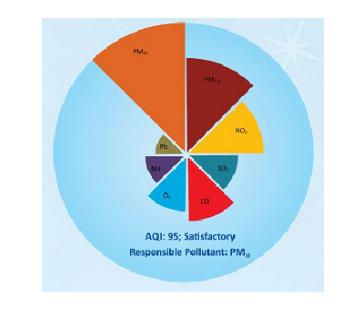

In [24]:
plt.figure(figsize=(12,5), dpi=80)
image = plt.imread('img/significance.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [25]:
temp_data = raw_data[['TEMP','RH','CH4','NMHC','NO', 'NOx']]

In [26]:
# axis = 1 : columnwise operation
data = raw_data.drop(columns=['TEMP','RH','CH4','NMHC','NO', 'NOx'],axis=1)
data.head()

CO   NO2    O3   PM10  PM2.5   SO2
0  0.79  16.0  37.0  177.0   78.0  12.0
1  0.80  16.0  36.0  178.0   77.0  11.0
2  0.71  13.0  38.0  163.0   72.0   8.0
3  0.66  11.0  39.0  147.0   65.0   6.5
4  0.53  10.0  38.0  131.0   56.0   5.5

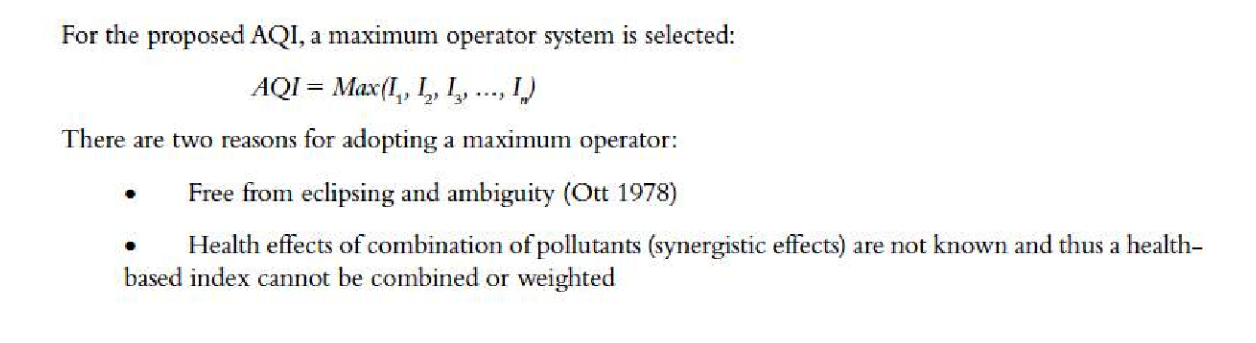

In [27]:
plt.figure(figsize=(20,10), dpi=80)
image = plt.imread('img/aqi.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [28]:
data['AQI']= data.max(axis=1)
data.head()

CO   NO2    O3   PM10  PM2.5   SO2    AQI
0  0.79  16.0  37.0  177.0   78.0  12.0  177.0
1  0.80  16.0  36.0  178.0   77.0  11.0  178.0
2  0.71  13.0  38.0  163.0   72.0   8.0  163.0
3  0.66  11.0  39.0  147.0   65.0   6.5  147.0
4  0.53  10.0  38.0  131.0   56.0   5.5  131.0

In [29]:
data['AQI'].describe()

count    5000.000000
mean       53.106000
std       101.548314
min        10.000000
25%        35.000000
50%        45.000000
75%        61.000000
max      5004.000000
Name: AQI, dtype: float64

In [30]:
aqi = data['AQI']
#aqi

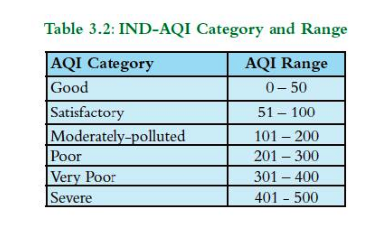

In [31]:
plt.figure(figsize=(12,5), dpi=60)
image = plt.imread('img/table.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [32]:
aqi[(aqi > 0) & (aqi <= 50)] = 0
aqi[(aqi > 50) & (aqi <= 100)] = 1
aqi[(aqi > 100) & (aqi <= 150)] = 2
aqi[(aqi > 150) & (aqi <= 200)] = 3
aqi[(aqi > 200)] = 4

# Creating a hashmap (dictionary)
hashmap = {}

# Adding key-value pairs
hashmap[0] = "Good"
hashmap[1] = "Satisfactory"
hashmap[2] = "Moderately-Polluted"
hashmap[3] = "Poor"
hashmap[4] = "Severe"

# Iterating through the hashmap
for key, value in hashmap.items():
    print(f"{key}: {value}")


0: Good
1: Satisfactory
2: Moderately-Polluted
3: Poor
4: Severe


In [33]:
aqi.unique()

array([3., 2., 1., 0., 4.])

In [34]:
data['label'] = data['AQI'].astype('int8')

In [35]:
data.drop(columns=['AQI'], axis= 1, inplace=True)

In [36]:
data.tail()

CO   NO2    O3  PM10  PM2.5   SO2  label
5103  0.37  20.0  53.0  33.0   15.0   7.0      1
5104  0.51  34.0  55.0  42.0   21.0  21.0      1
5105  0.63  35.0  43.0  43.0   25.0  14.0      0
5106  0.59  27.0  43.0  40.0   26.0   3.6      0
5107  0.60  27.0  19.0  38.0   25.0   2.3      0

In [37]:
temp_data.head()

TEMP    RH  CH4  NMHC   NO   NOx
0  16.0  57.0  2.1  0.14  1.2  17.0
1  16.0  57.0  2.1  0.15  1.3  17.0
2  16.0  57.0  2.1  0.13  1.0  14.0
3  15.0  58.0  2.0  0.12  0.8  12.0
4  15.0  58.0  2.0  0.11  0.6  11.0

In [38]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    5000 non-null   float64
 1   RH      5000 non-null   float64
 2   CH4     5000 non-null   float64
 3   NMHC    5000 non-null   float64
 4   NO      5000 non-null   float64
 5   NOx     5000 non-null   float64
dtypes: float64(6)
memory usage: 273.4 KB


In [39]:
data.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107],
      dtype='int64', length=5000)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      5000 non-null   float64
 1   NO2     5000 non-null   float64
 2   O3      5000 non-null   float64
 3   PM10    5000 non-null   float64
 4   PM2.5   5000 non-null   float64
 5   SO2     5000 non-null   float64
 6   label   5000 non-null   int8   
dtypes: float64(6), int8(1)
memory usage: 278.3 KB


In [41]:
data = temp_data.join(data)

In [42]:
data.head()

TEMP    RH  CH4  NMHC   NO   NOx    CO   NO2    O3   PM10  PM2.5   SO2  \
0  16.0  57.0  2.1  0.14  1.2  17.0  0.79  16.0  37.0  177.0   78.0  12.0   
1  16.0  57.0  2.1  0.15  1.3  17.0  0.80  16.0  36.0  178.0   77.0  11.0   
2  16.0  57.0  2.1  0.13  1.0  14.0  0.71  13.0  38.0  163.0   72.0   8.0   
3  15.0  58.0  2.0  0.12  0.8  12.0  0.66  11.0  39.0  147.0   65.0   6.5   
4  15.0  58.0  2.0  0.11  0.6  11.0  0.53  10.0  38.0  131.0   56.0   5.5   

   label  
0      3  
1      3  
2      3  
3      2  
4      2

# Save the Labled dataset we created

In [43]:
# Run this code to save the labeled data
#data.to_csv('input/labeled_data.csv',index=False)

# Data Preprocessing and Labeling Completed

# Data Analysis

In [44]:
data.head()

TEMP    RH  CH4  NMHC   NO   NOx    CO   NO2    O3   PM10  PM2.5   SO2  \
0  16.0  57.0  2.1  0.14  1.2  17.0  0.79  16.0  37.0  177.0   78.0  12.0   
1  16.0  57.0  2.1  0.15  1.3  17.0  0.80  16.0  36.0  178.0   77.0  11.0   
2  16.0  57.0  2.1  0.13  1.0  14.0  0.71  13.0  38.0  163.0   72.0   8.0   
3  15.0  58.0  2.0  0.12  0.8  12.0  0.66  11.0  39.0  147.0   65.0   6.5   
4  15.0  58.0  2.0  0.11  0.6  11.0  0.53  10.0  38.0  131.0   56.0   5.5   

   label  
0      3  
1      3  
2      3  
3      2  
4      2

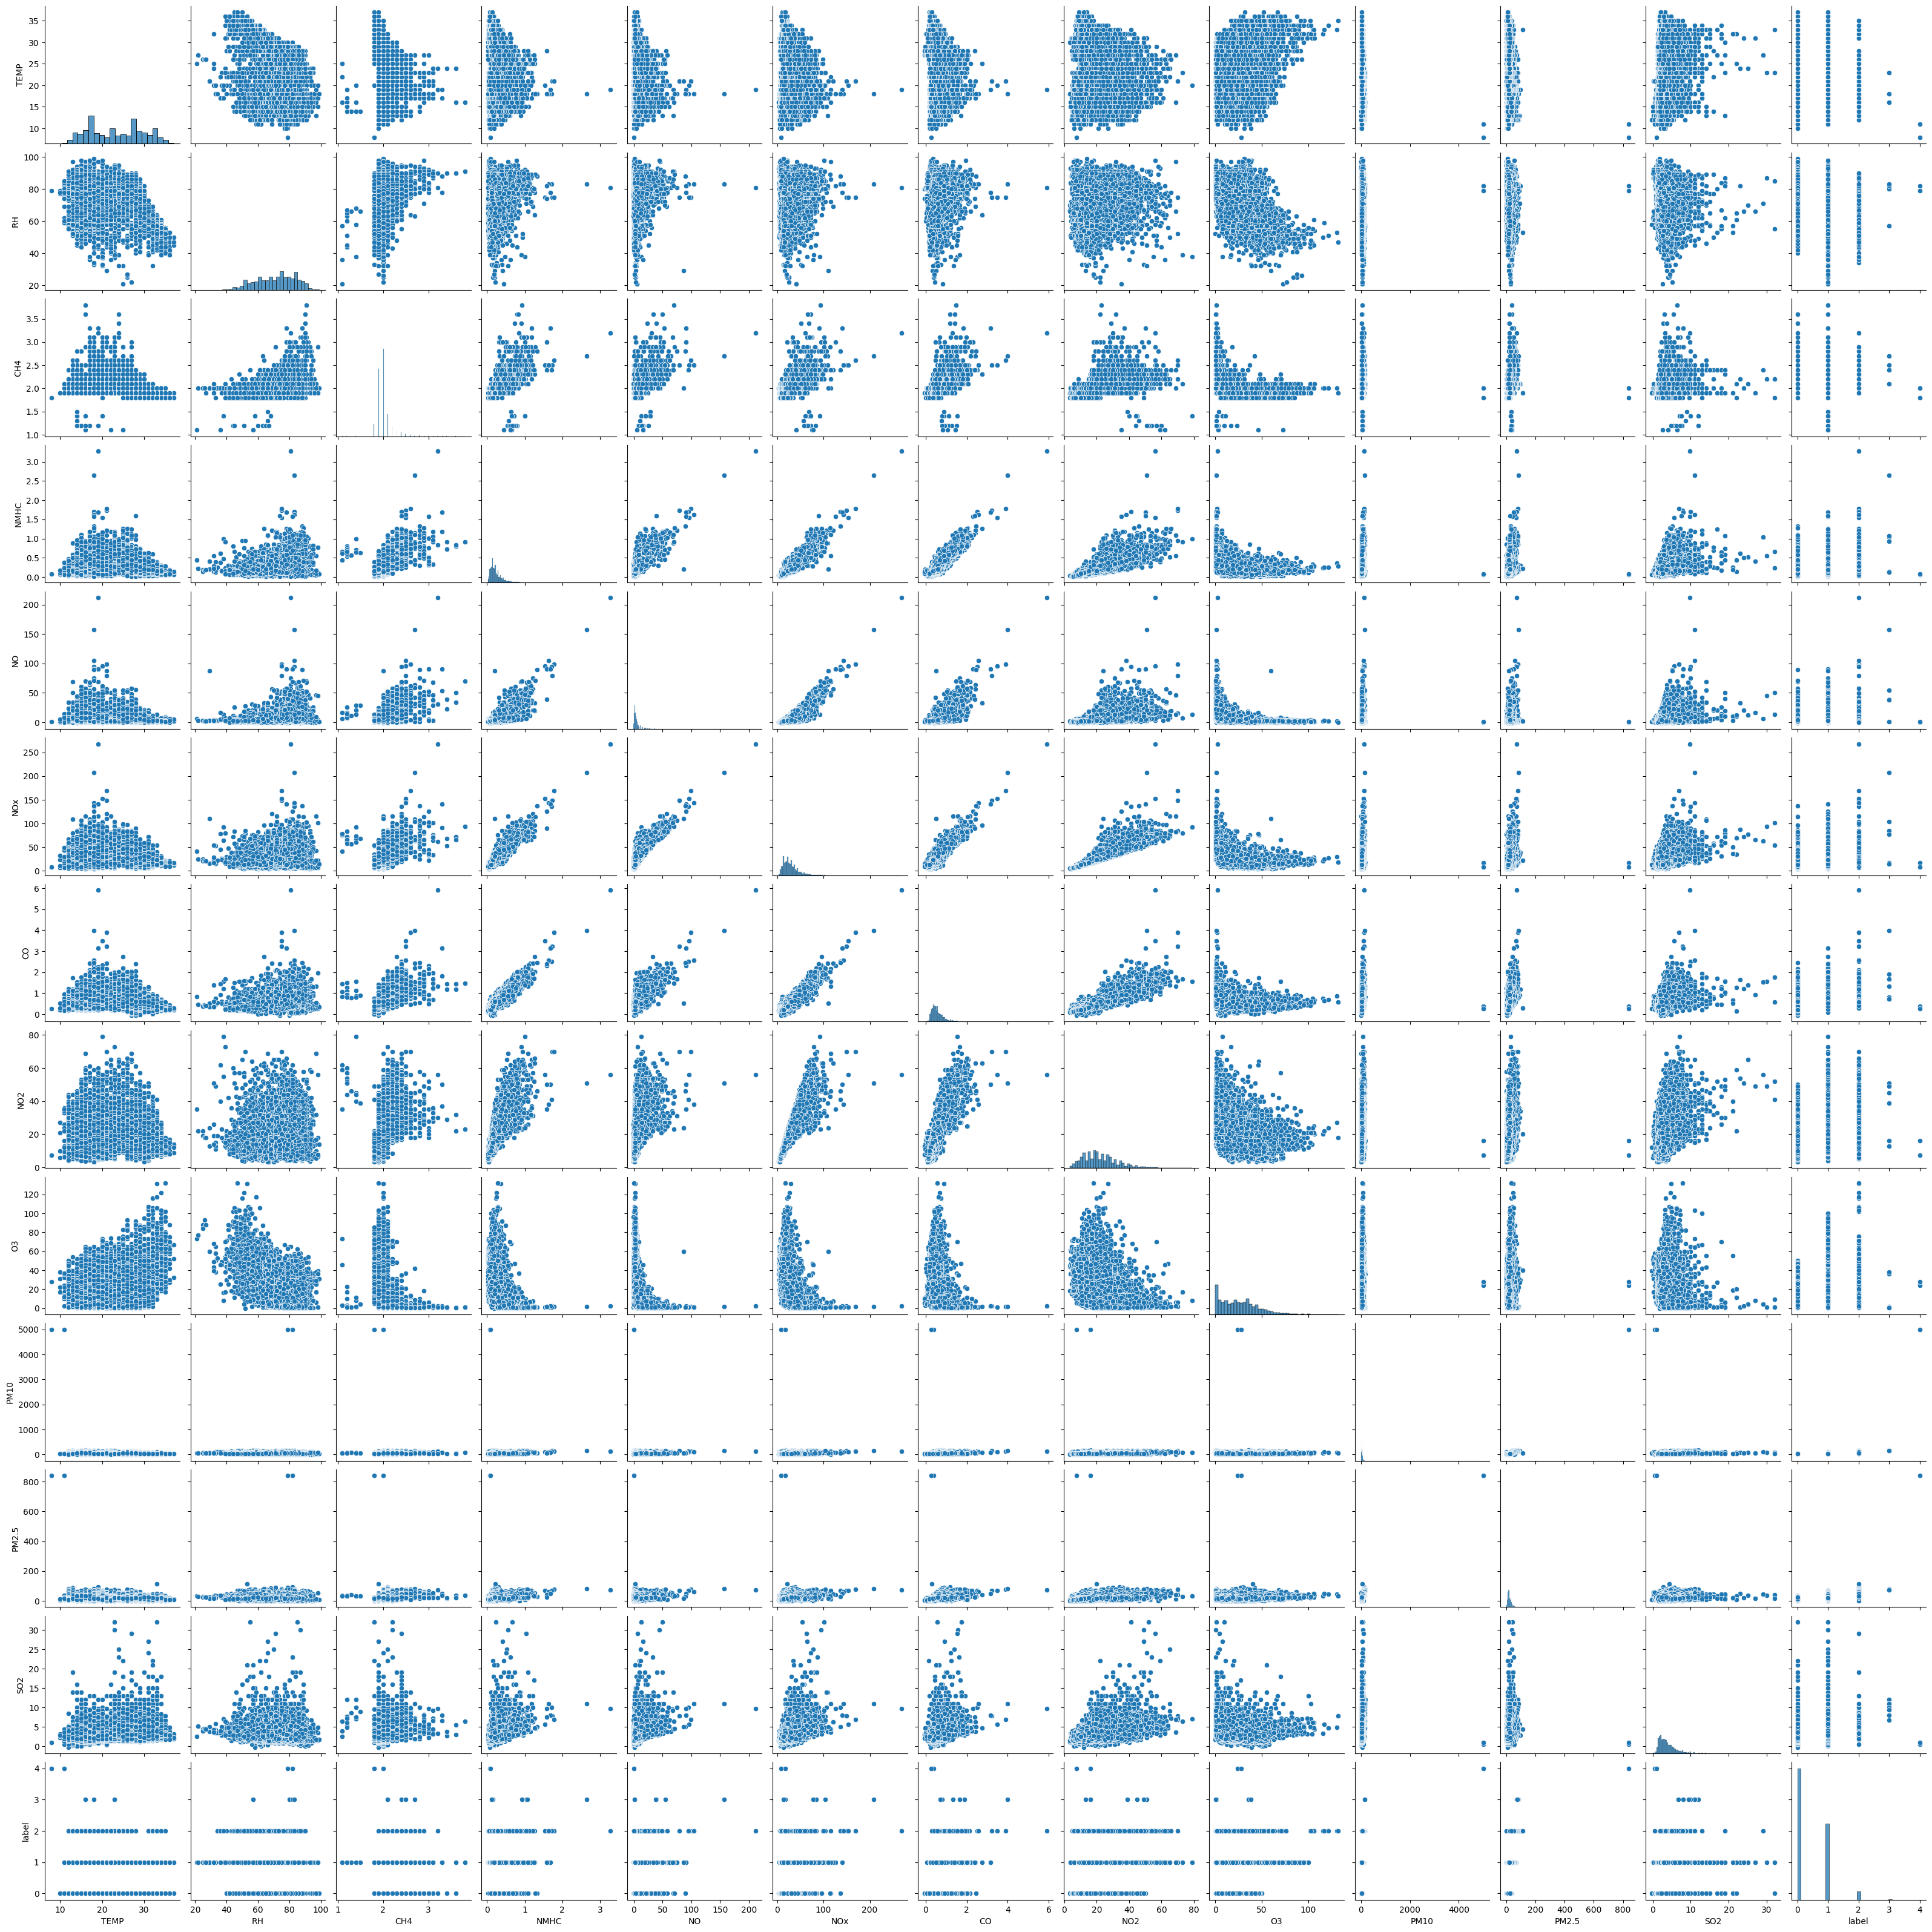

In [45]:
sns.pairplot(data)

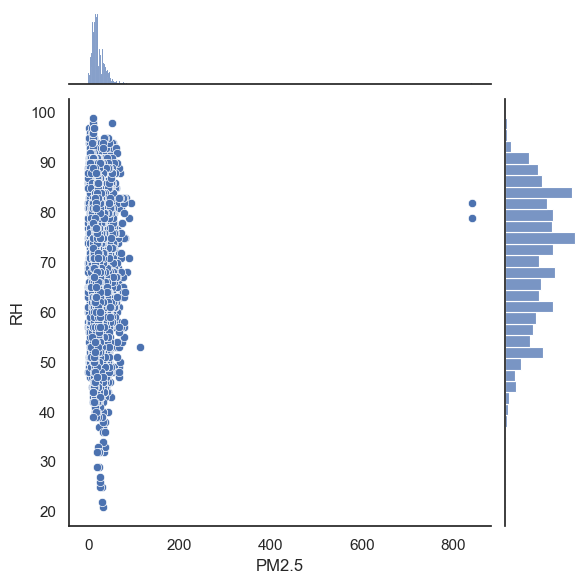

In [46]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='PM2.5',y='RH',data=data)     

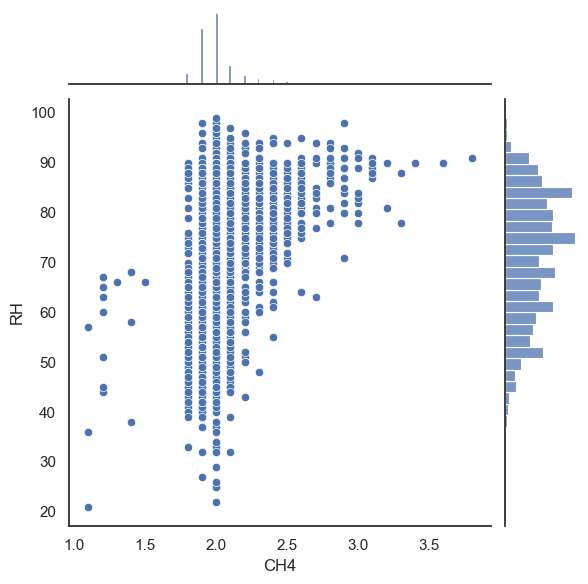

In [47]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='RH',data=data)

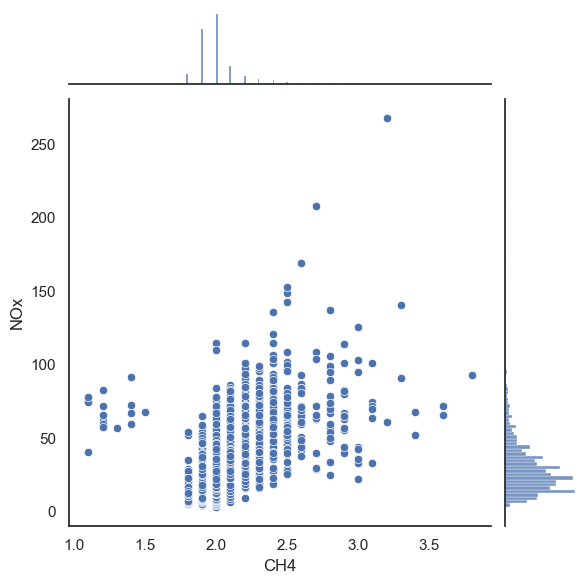

In [48]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='NOx',data=data)

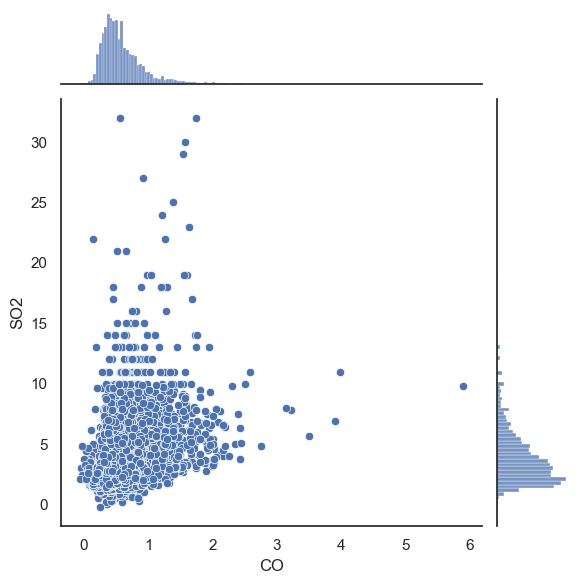

In [49]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CO',y='SO2',data=data)

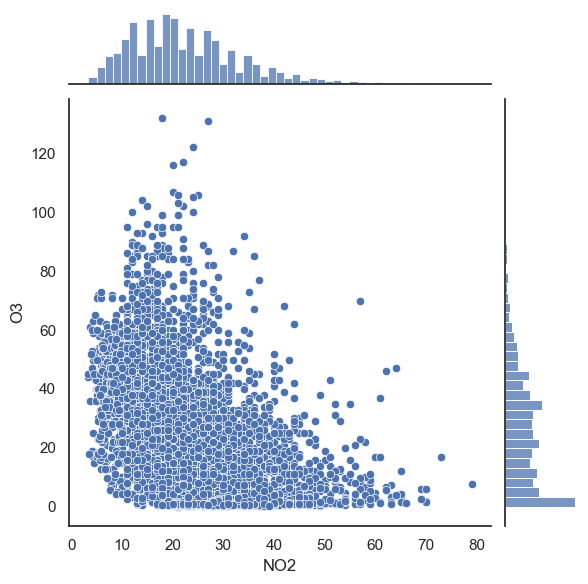

In [50]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='O3',data=data)

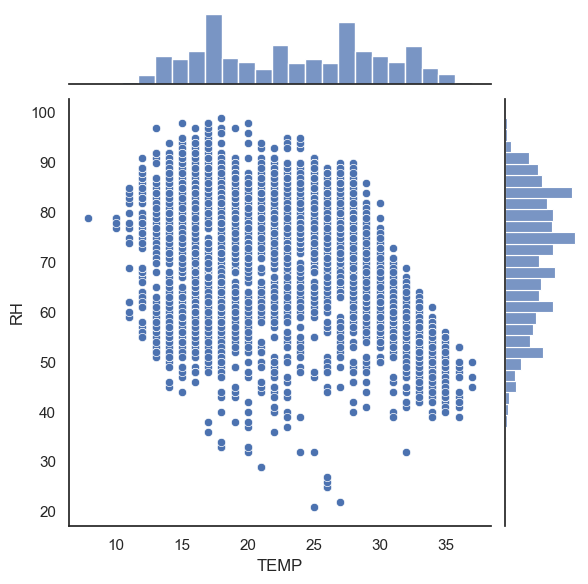

In [51]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='TEMP',y='RH',data=data)

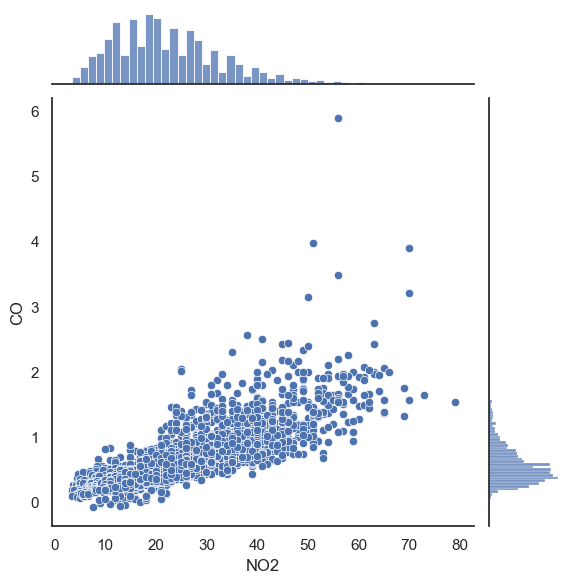

In [52]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='CO',data=data)

# Train Test Split

Now its time to split our data into a training set and a testing set!

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#execute this part of code if needed to write all the train and test data into excel file 

# X_train.to_excel('Traning_Testing/X_train.xlsx')
# X_test.to_excel('Traning_Testing/X_test.xlsx')
# y_train.to_excel('Traning_Testing/y_train.xlsx')
# y_test.to_excel('Traning_Testing/y_test.xlsx')

# Training the Random Forest model

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(n_estimators=600)

In [58]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# Predictions

In [59]:
predictions = rfc.predict(X_test)

In [60]:
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

**Now create a classification report from the results**

In [64]:
from sklearn.metrics import classification_report, precision_score, accuracy_score, confusion_matrix
from collections import Counter

# Check class distribution
print("Class distribution in y_test:", Counter(y_test))

# Evaluate with classification report
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
print("Precision (weighted):", precision)
print(classification_report(y_test, predictions, zero_division=0))

# If ignoring certain labels
# print(classification_report(y_test, predictions, labels=[0, 1, 2], zero_division=0))
accuarcy = accuracy_score(y_test, predictions)
print("accuarcy of the model: ", (accuarcy*100) ,"%")


Class distribution in y_test: Counter({0: 611, 1: 357, 2: 32})
Precision (weighted): 0.9990016339869281
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       357
           2       1.00      1.00      1.00        32

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

accuarcy of the model:  99.9 %


In [65]:
print(confusion_matrix(y_test,predictions))

[[611   0   0]
 [  1 356   0]
 [  0   0  32]]


In [67]:
CO = X_test.CO
SO2 = X_test.SO2
NO2 = X_test.NO2
O3 = X_test.O3
PM10 = X_test.PM10

In [68]:
CO_mean = CO.mean()
SO2_mean = SO2.mean()
NO2_mean = NO2.mean()
O3_mean = O3.mean()
PM10_mean = PM10.mean()

In [69]:
def checkCo(q):
    v = ''
    if q > 0 and q <= 1:
        v = "Good"
    elif q > 1.1 and q <= 2.0:
        v = "Satisfactory"
    elif q > 2.1 and q <= 10:
        v = "Moderately Polluted"
    elif q > 10 and q <= 17:
        v = "Poor"
    elif q > 17 and q <= 34:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('CO-->  %2.3f    %s' %(q, v))
        

In [70]:
def checkSO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 380:
        v = "Moderately Polluted"
    elif q > 381 and q <= 800:
        v = "Poor"
    elif q > 801 and q <= 1600:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('SO2-->  %2.3f    %s' %(q, v))

In [71]:
def checkNO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 180:
        v = "Moderately Polluted"
    elif q > 181 and q <= 280:
        v = "Poor"
    elif q > 281 and q <= 400:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('NO2-->  %2.3f    %s' %(q, v))

In [72]:
def checkO3(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 168:
        v = "Moderately Polluted"
    elif q > 169 and q <= 208:
        v = "Poor"
    elif q > 209 and q <= 748:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('O3-->  %2.3f    %s' %(q, v))

In [73]:
def checkPM(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 250:
        v = "Moderately Polluted"
    elif q > 251 and q <= 350:
        v = "Poor"
    elif q > 351 and q <= 430:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('PM-->  %2.3f    %s' %(q, v))

# Air Quality Analysis

CO-->  0.596    Good
SO2-->  3.709    Good
NO2-->  22.270    Good
O3-->  26.136    Good
PM-->  46.869    Good


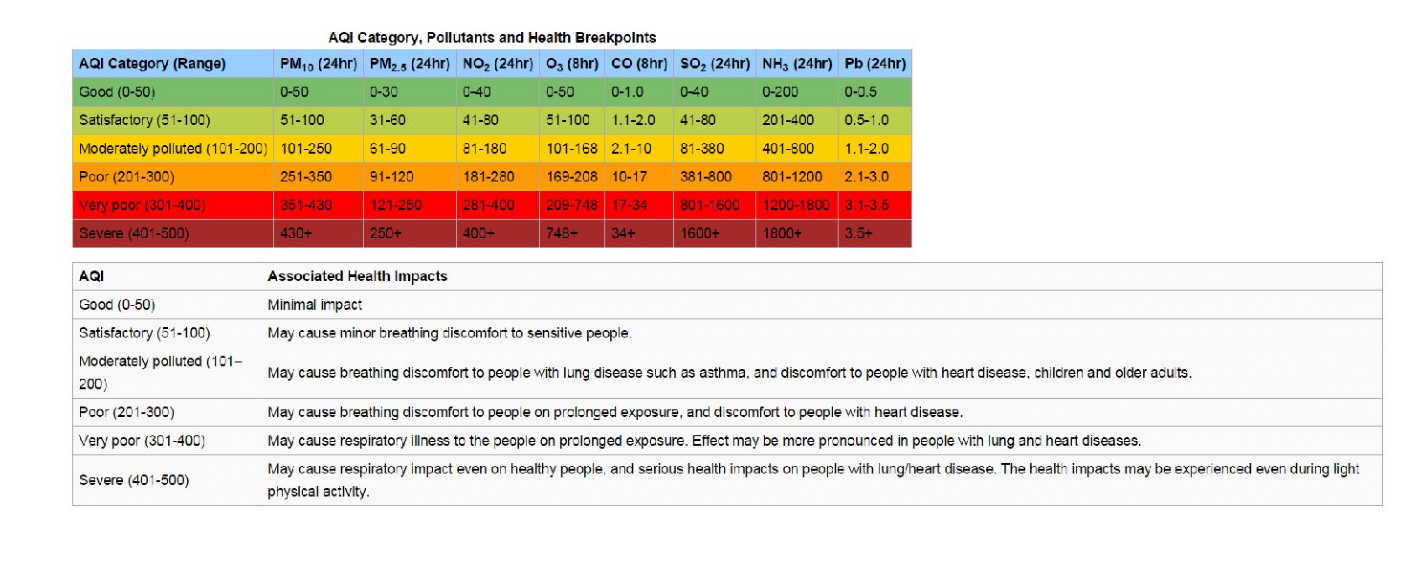

In [74]:
l = [checkCo(CO_mean), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM(PM10_mean)]
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('img/1a.png')
plt.axis('off')
plt.imshow(image)
plt.show()

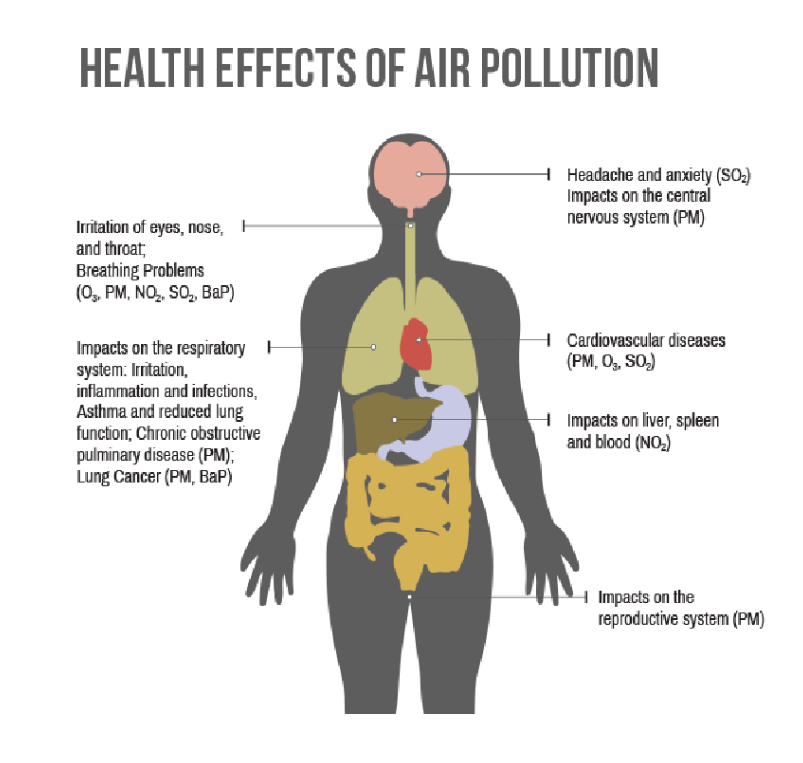

In [75]:
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('img/health.png')
plt.axis('off')
plt.imshow(image)
plt.show()

# Real Time Prediction

In [76]:
# Feature names based on the provided labels
feature_names = ['TEMP', 'RH', 'CH4', 'NMHC', 'NO', 'NOx', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

# Create the DataFrame with the correct column names
x_test_dt = [[16, 57, 2.1, 0.14, 1.2, 17, 0.79, 16, 37, 177, 78, 12]]
df = pd.DataFrame(x_test_dt, columns=feature_names)

# Predict using the trained model
pred = rfc.predict(df)

# Output the prediction
print(pred)
print(f"The condition of the air quality is: '{pred}' is '{hashmap[pred[0]]}'")


[3]
The condition of the air quality is: '[3]' is 'Poor'


In [77]:
# Contineous monitering of the data
import random

# Define the feature names
feature_names = ['TEMP', 'RH', 'CH4', 'NMHC', 'NO', 'NOx', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']


# Function to randomly generate data values within certain ranges
def generate_random_data():
    return [
        random.uniform(0, 50),    # TEMP (Temperature)
        random.uniform(0, 100),   # RH (Relative Humidity)
        random.uniform(0, 10),    # CH4 (Methane concentration)
        random.uniform(0, 1),     # NMHC (Non-methane hydrocarbons)
        random.uniform(0, 100),   # NO (Nitrogen Oxides)
        random.uniform(0, 100),   # NOx (Nitrogen oxides total)
        random.uniform(0, 10),    # CO (Carbon monoxide)
        random.uniform(0, 50),    # NO2 (Nitrogen dioxide)
        random.uniform(0, 200),   # O3 (Ozone)
        random.uniform(0, 300),   # PM10 (Particulate Matter 10)
        random.uniform(0, 200),   # PM2.5 (Particulate Matter 2.5)
        random.uniform(0, 10)     # SO2 (Sulfur dioxide)
    ]

# Function to simulate air quality prediction
def predict_air_quality():
    while True:
        # Generate random data for each feature
        x_test_dt = [generate_random_data()]
        df = pd.DataFrame(x_test_dt, columns=feature_names)
        
        # Predict using the trained model (rfc is your trained model)
        pred = rfc.predict(df)
        
        # Output the prediction
        print(pred)
        print(f"The condition of the air quality is: '{pred[0]}' which is '{hashmap[pred[0]]}'")
        if(pred >=3):
            print("Alert ------------------------------>>>> BUZZER ")

# Call the function to start the infinite loop
predict_air_quality()


[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[1]
The condition of the air quality is: '1' which is 'Satisfactory'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[1]
The condition of the air quality is: '1' which is 'Satisfactory'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[1]
The condition of the air quality is: '1' which is 'Satisfactory'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[2]
The condition of the air quality is: '2' which is 'Moderately-Polluted'
[2]
The condition of the air qual

KeyboardInterrupt: 